<a href="https://colab.research.google.com/github/profliuhao/CSIT553/blob/main/CSIT553_class11_aggregation_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSIT 553 Example: Aggregation

In [1]:
!pip install dash
!pip install jupyter-dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 33.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import pandas as pd
import dash
#import dash_html_components as html
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
from dash import Dash
import plotly.graph_objects as go
import plotly.express as px

## Histogram using Seaborn

In [3]:
penguins = sns.load_dataset("penguins")

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Assign a variable to x to plot a univariate distribution along the x or y axis:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

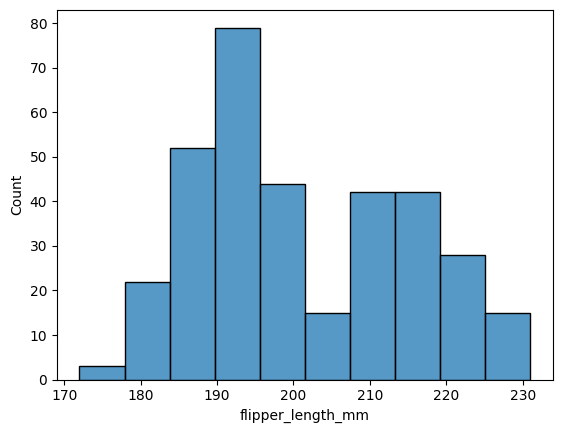

In [5]:
sns.histplot(data=penguins, x="flipper_length_mm")

<Axes: xlabel='Count', ylabel='flipper_length_mm'>

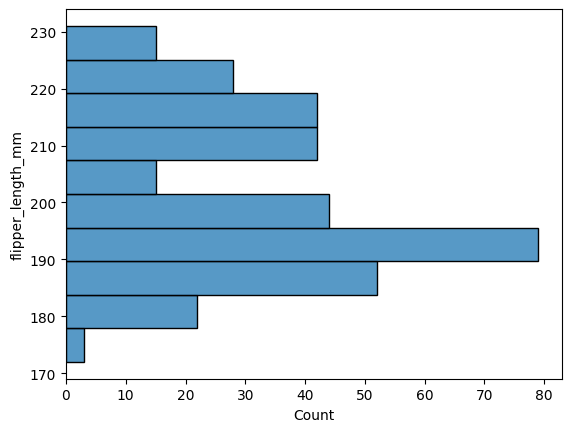

In [6]:
sns.histplot(data=penguins, y="flipper_length_mm")

Check how well the histogram represents the data by specifying a different bin width:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

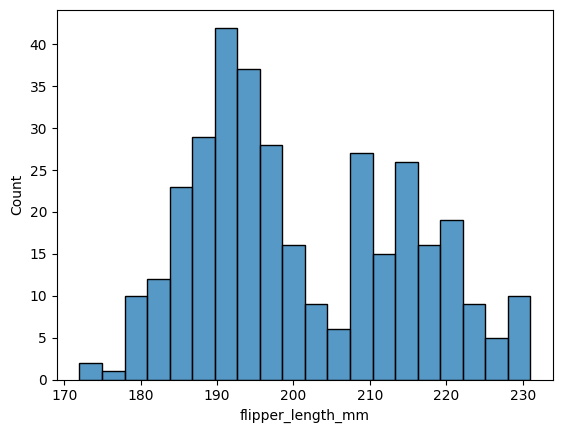

In [7]:
sns.histplot(data=penguins, x="flipper_length_mm", binwidth=3)

You can also define the total number of bins to use:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

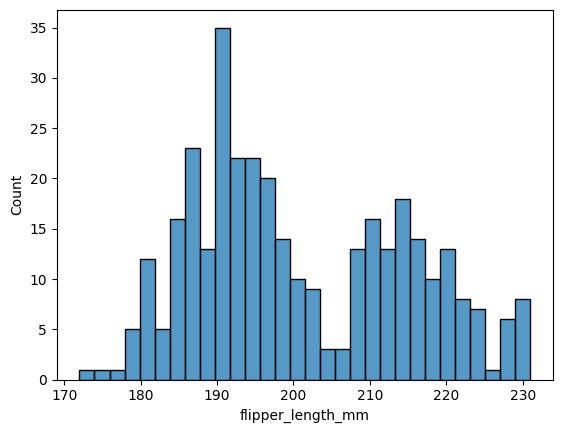

In [8]:
sns.histplot(data=penguins, x="flipper_length_mm", bins=30)

Add a kernel density estimate to smooth the histogram, providing complementary information about the shape of the distribution:



<Axes: xlabel='flipper_length_mm', ylabel='Count'>

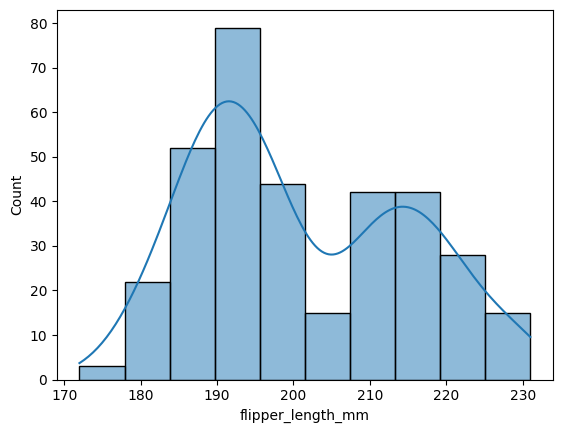

In [9]:
sns.histplot(data=penguins, x="flipper_length_mm", kde=True)

You can otherwise draw multiple histograms from a long-form dataset with hue mapping:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

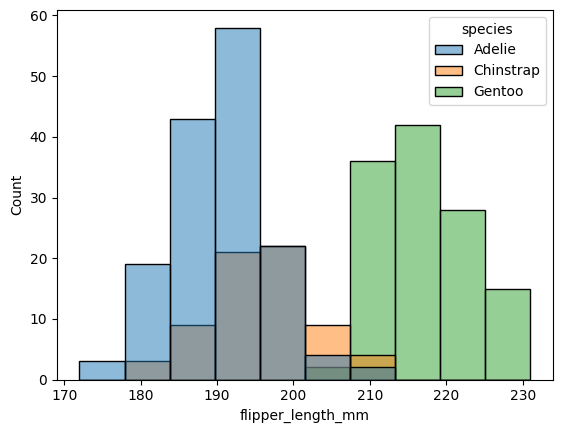

In [10]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species")

The default approach to plotting multiple distributions is to “layer” them, but you can also “stack” them:

<Axes: xlabel='flipper_length_mm', ylabel='Count'>

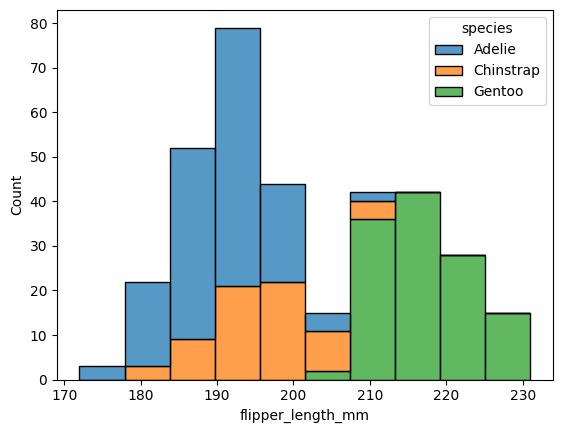

In [11]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack")

It’s also possible to normalize so that each bar’s height shows a probability, which make more sense for discrete variables:

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

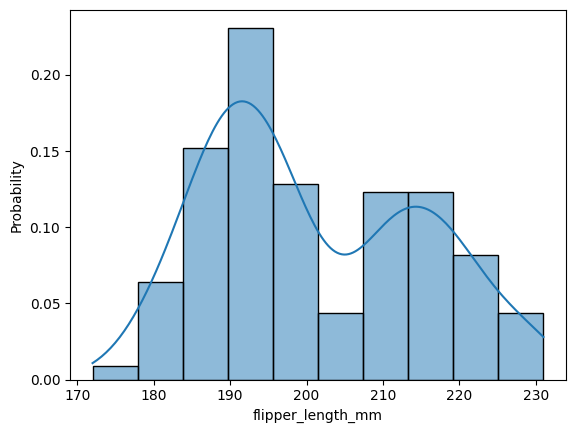

In [12]:
sns.histplot(data=penguins, x="flipper_length_mm",stat='probability', kde=True)

You can even draw a histogram over categorical variables and use a hue with discrete data.

<Axes: xlabel='species', ylabel='Count'>

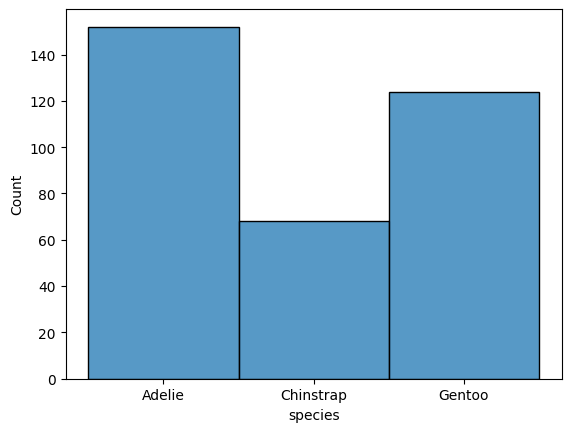

In [13]:
sns.histplot(data=penguins,x='species')

<Axes: xlabel='species', ylabel='Count'>

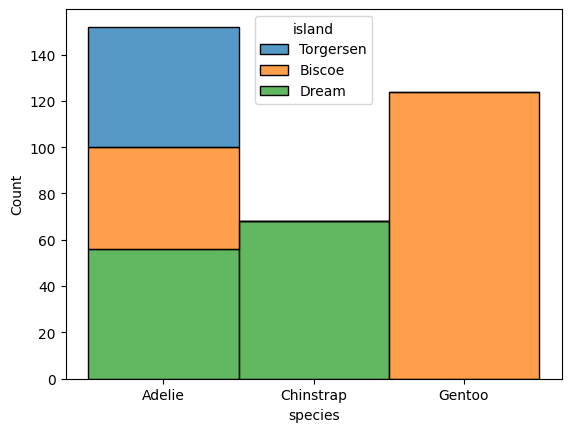

In [14]:
sns.histplot(data=penguins,x='species',hue='island',multiple="stack")

<Axes: xlabel='species', ylabel='Count'>

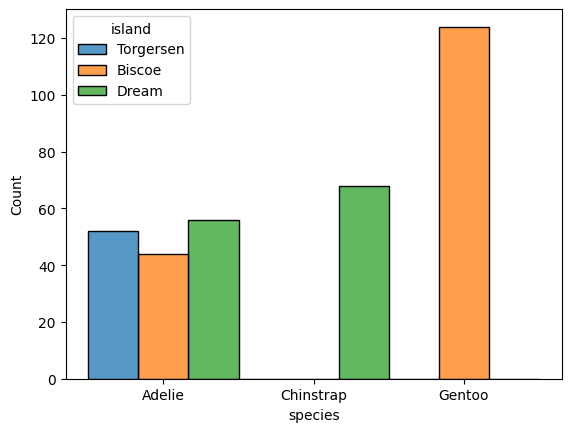

In [15]:
sns.histplot(data=penguins,x='species',hue='island',multiple="dodge")

### Binning Scatterplots

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

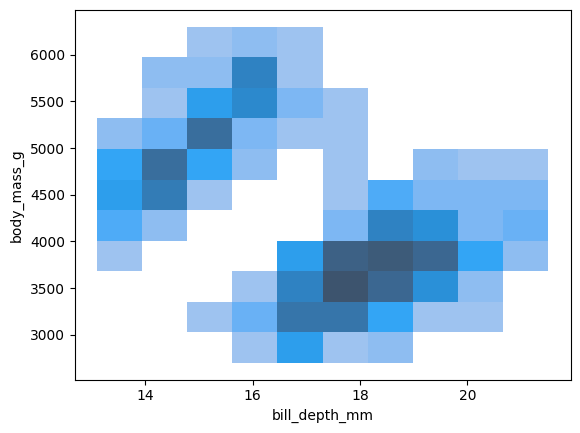

In [16]:
sns.histplot(penguins, x="bill_depth_mm", y="body_mass_g")

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

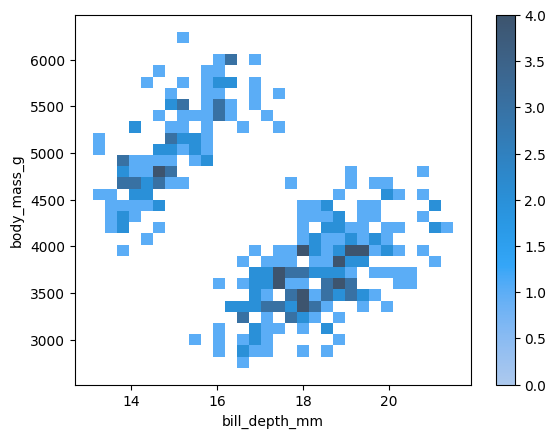

In [17]:
sns.histplot(
    penguins, x="bill_depth_mm", y="body_mass_g",
    bins=30, cbar=True
)

### Continuous scatterplot

**kdeplot** can be used to draw continuous scatterplot.

Online resource: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

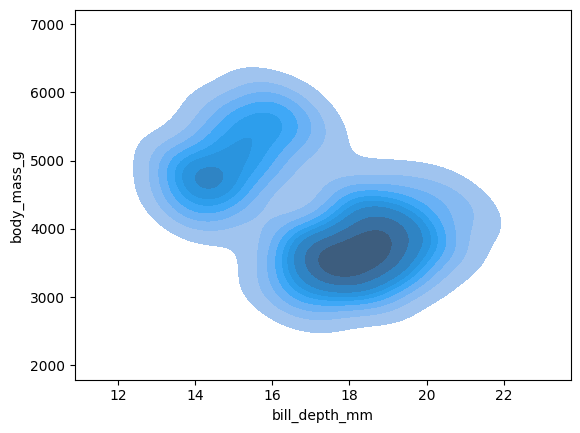

In [18]:
sns.kdeplot(
    data=penguins, x="bill_depth_mm", y="body_mass_g",
    fill=True
)

## Box plot using Seaborn

In [19]:
tips = sns.load_dataset("tips")

In [20]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: ylabel='total_bill'>

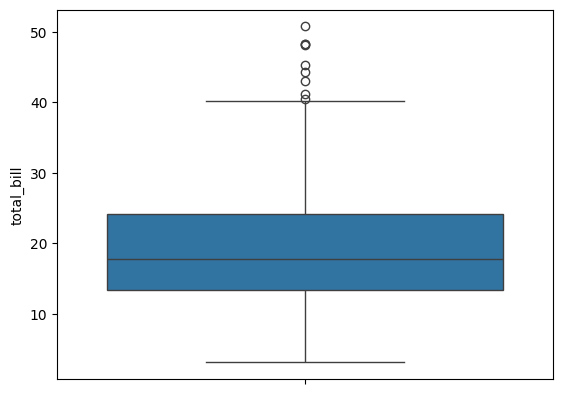

In [21]:
sns.boxplot(y=tips["total_bill"])

Draw a vertical boxplot grouped by a categorical variable:


<Axes: xlabel='day', ylabel='total_bill'>

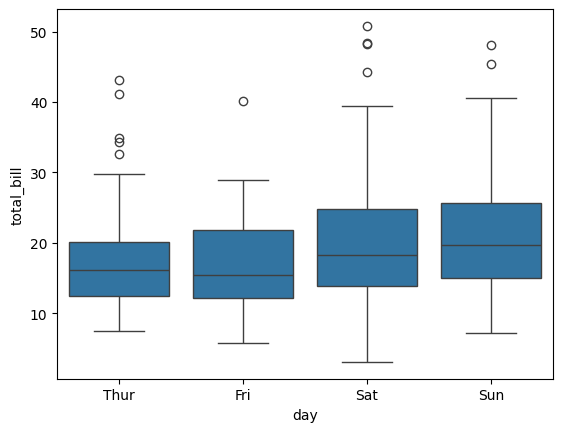

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips)

Draw a boxplot with nested grouping by two categorical variables:

<Axes: xlabel='day', ylabel='total_bill'>

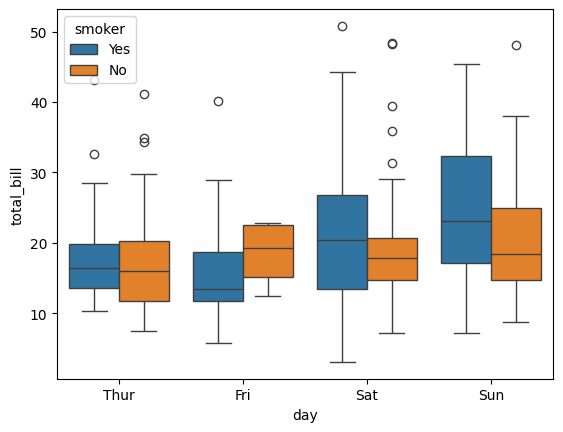

In [23]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips)

Use swarmplot() to show the datapoints on top of the boxes:

<Axes: xlabel='day', ylabel='total_bill'>

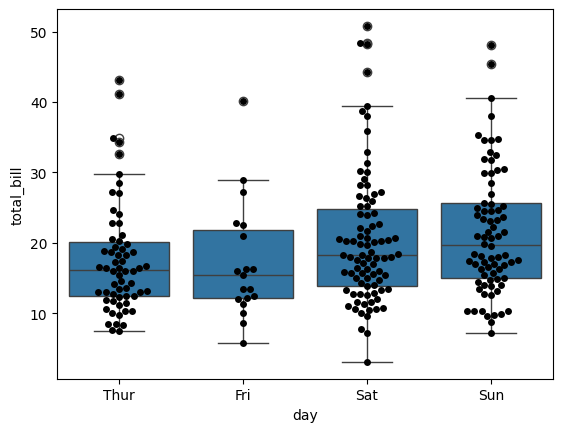

In [24]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips,color='black')


Facet grid using seaborn

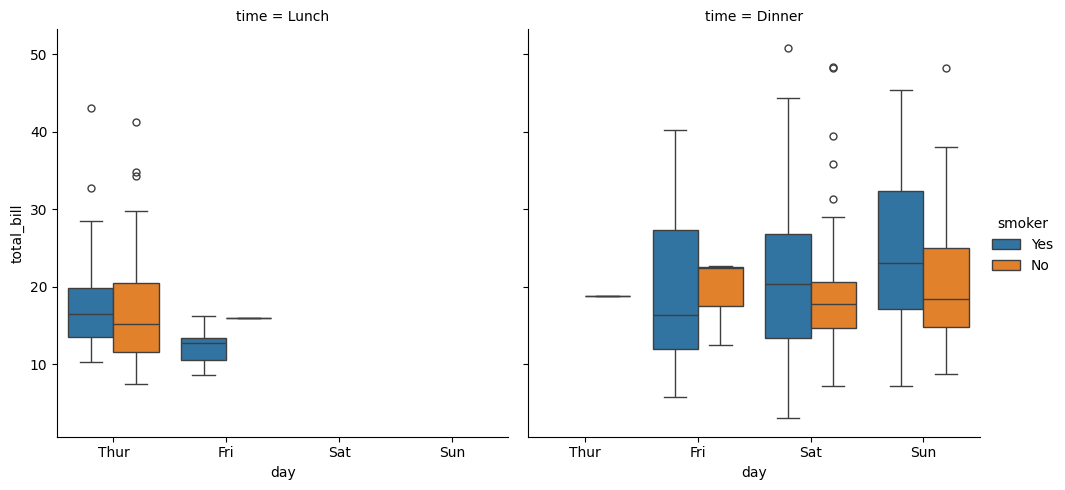

In [25]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            col='time',kind='box')

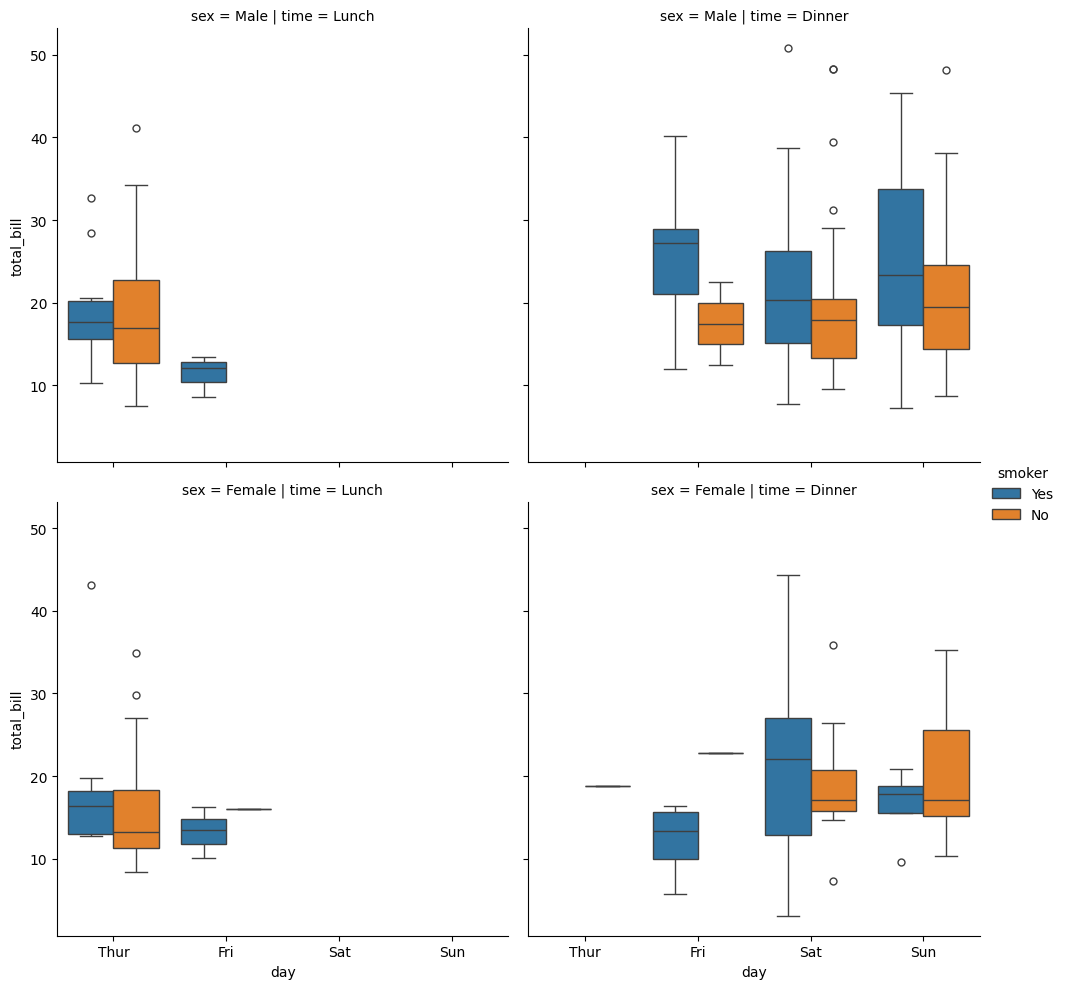

In [26]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker",
            row='sex',col='time',kind='box')
plt.savefig("haha.png")

## Violin Plot using seaborn

Online resource: https://seaborn.pydata.org/generated/seaborn.violinplot.html

<Axes: ylabel='total_bill'>

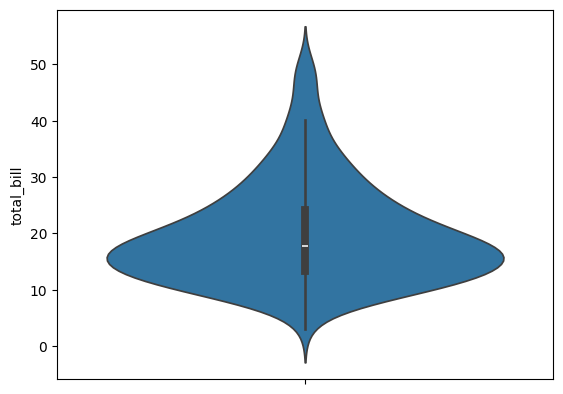

In [27]:
sns.violinplot(y=tips['total_bill'])

<Axes: xlabel='day', ylabel='total_bill'>

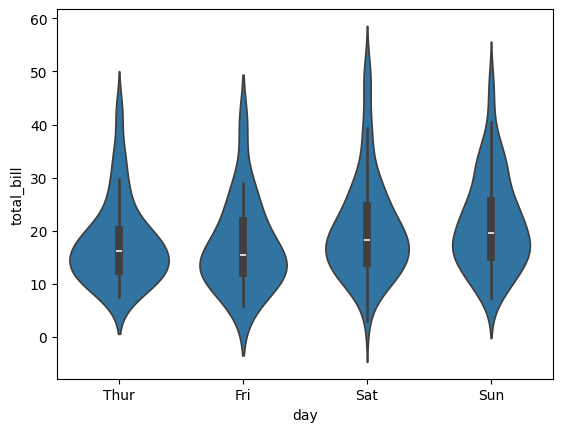

In [28]:
sns.violinplot(x="day", y="total_bill", data=tips)

<Axes: xlabel='day', ylabel='total_bill'>

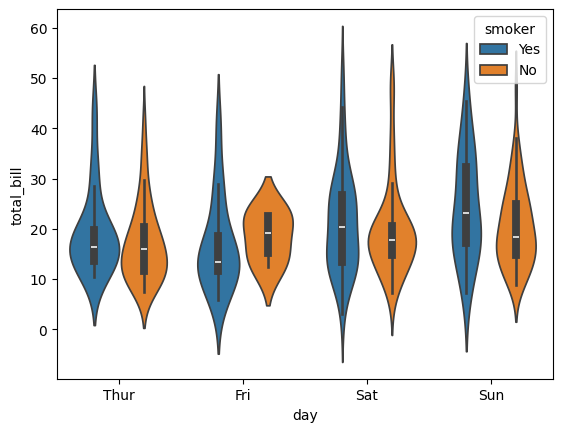

In [29]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips)

Draw split violins to compare the across the hue variable:

<Axes: xlabel='day', ylabel='total_bill'>

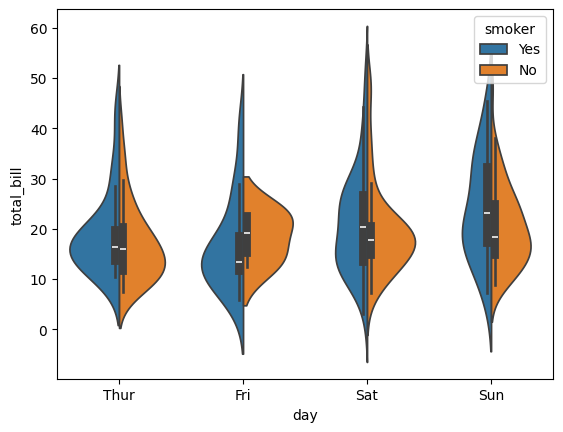

In [30]:
sns.violinplot(x="day", y="total_bill", hue="smoker", data=tips,split=True)

## Box Plot using plotly.express

In [31]:
import plotly.express as px
df = px.data.tips()
fig = px.box(df, y="total_bill")
fig.show()

If a column name is given as x argument, a box plot is drawn for each value of x.

In [32]:
fig = px.box(df, x="time", y="total_bill")
fig.show()

Display the underlying data

In [33]:
fig = px.box(df, x="time", y="total_bill", points="all")
fig.show()

### Box plot in Dash

In [34]:
# Create a dash application
app = Dash(__name__)

app.layout = html.Div([
    html.H2("x-axis:"),
    dcc.Checklist(
        id='x-axis',
        options=[{'value': x, 'label': x}
                 for x in ['smoker', 'day', 'time', 'sex']],
        value=['time'],
        labelStyle={'display': 'inline-block'}
    ),
    html.H2("y-axis:"),
    dcc.RadioItems(
        id='y-axis',
        options=[{'value': x, 'label': x}
                 for x in ['total_bill', 'tip', 'size']],
        value='total_bill',
        labelStyle={'display': 'inline-block'}
    ),
    dcc.Graph(id="box-plot"),
])

@app.callback(
    Output("box-plot", "figure"),
    [Input("x-axis", "value"),
     Input("y-axis", "value")])
def generate_chart(x, y):
    fig = px.box(df, x=x, y=y)
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(mode="inline", port=8899)

<IPython.core.display.Javascript object>

## Histogram with Plot Express

In [35]:
fig = px.histogram(df, x="total_bill")
fig.show()

In [36]:
fig = px.histogram(df, x="day")
fig.show()


Choosing the number of bins:
    

In [37]:
fig = px.histogram(df, x="total_bill", nbins=20)
fig.show()

#### Type of normalization

The default mode is to represent the count of samples in each bin. With the histnorm argument, it is also possible to represent the percentage or fraction of samples in each bin (histnorm='percent' or probability), or a density histogram (the sum of all bar areas equals the total number of sample points, density), or a probability density histogram (the sum of all bar areas equals 1, probability density).

In [38]:
fig = px.histogram(df, x="total_bill", histnorm='probability density')
fig.show()

Several histograms for the different values of one column (stacked)

In [39]:
fig = px.histogram(df, x="total_bill", color="sex")
fig.show()


#### Visualizing the distribution
With the **marginal** keyword, a subplot is drawn alongside the histogram, visualizing the distribution. See the distplot page for more examples of combined statistical representations.



In [40]:
fig = px.histogram(df, x="total_bill", color="sex", marginal="rug", # can be `box`, `violin`
                         hover_data=df.columns)
fig.show()